In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Telco Customer Churn:
This data set is a reflection of a point in time of customers that left within the last month (the column is called Churn) along with a sample of those that have not churned over.

**Goal: Predict behavior to retain customers. I can analyze all relevant customer data and develop focused customer retention programs**

### I.) Import Data

In [2]:
Telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### II.) Import Data **Checking and Correcting Types**
- Total Charges are the wrong type. We need it to be of type float.
- Need to One-Hot-Encode objects like gender, partner, Dependents, etc for classification processing (but that will be for later)

In [3]:
Telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### a.) TotalCharges Correction 
Needs to be converted to number rather than character

In [4]:
Telco_df.TotalCharges = pd.to_numeric(Telco_df.TotalCharges, errors='coerce')

##### b.) SeniorCitizen Correction 
'Yes' and 'No' need to be converted to 1 or 0

In [5]:
Telco_df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
7013    0
7014    0
7015    1
7016    0
7017    0
7018    0
7019    0
7020    0
7021    0
7022    0
7023    1
7024    0
7025    0
7026    0
7027    0
7028    0
7029    1
7030    0
7031    1
7032    1
7033    0
7034    0
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [6]:
Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].apply(str)
#Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].str.replace('1', 'Yes', regex=True)
#Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].str.replace('0', 'No', regex=True)


##### c.) Dropping Unnecesary CustomerID

In [7]:
Telco_df=Telco_df.drop(columns = 'customerID')

## III.) Unique And Missing Values

##### Missing Values & Unique Values 
- There seems to be a few values missing. Specifically, Total Charges are absent for those with missing values
- On the bright side, there seems to be a correct amount of unique responses for each column.

In [8]:
print ("\nMissing values :  ", Telco_df.isnull().sum().values.sum())
print ("\nUnique values : \n", Telco_df.nunique())


Missing values :   11

Unique values : 
 gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [9]:
Telco_df[Telco_df.isnull().any(axis=1)].iloc[:,14:]

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Two year,No,Mailed check,20.25,NaN,No
936,Two year,No,Mailed check,80.85,NaN,No
1082,Two year,No,Mailed check,25.75,NaN,No
1340,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Two year,No,Mailed check,19.85,NaN,No
3826,Two year,No,Mailed check,25.35,NaN,No
4380,Two year,No,Mailed check,20.00,NaN,No
5218,One year,Yes,Mailed check,19.70,NaN,No
6670,Two year,No,Mailed check,73.35,NaN,No


In [10]:
Telco_df.dropna(inplace = True)

In [11]:
Telco_df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
Telco_df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
Telco_df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
Telco_df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [15]:
Telco_df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [16]:
Telco_df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
Telco_df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [18]:
Telco_df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
Telco_df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
Telco_df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
Telco_df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [22]:
Telco_df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [23]:
Telco_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [24]:
Telco_df.Churn.unique()

array(['No', 'Yes'], dtype=object)

# IV.) Simple Data Analysis

### a.) Histogram of Churn

- We notice that from the sample of clients, they populate they strongly populate the first month and the last month.
- When we break down the Churn variable, we see that those that DO CHURN do so in the first few months. There is a decrease in those that churn months later, which makes sense because those who don't want to be with the company would do it early on.
- Currently, when we look at each month, the first month and last month are the highest with population.

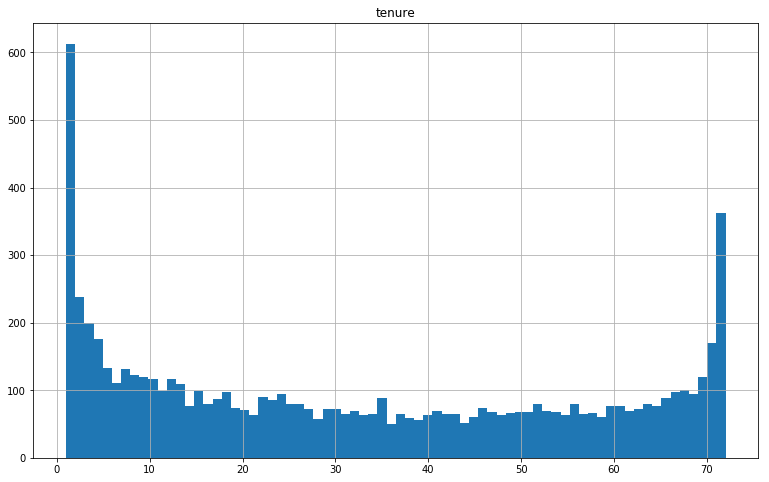

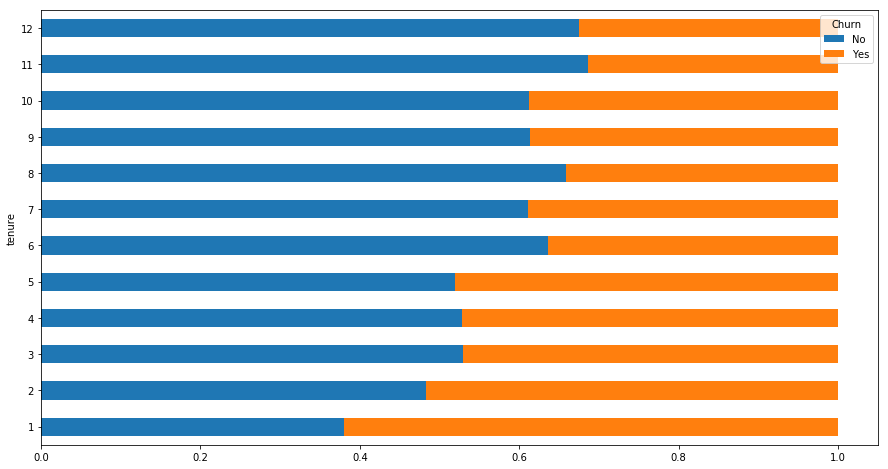

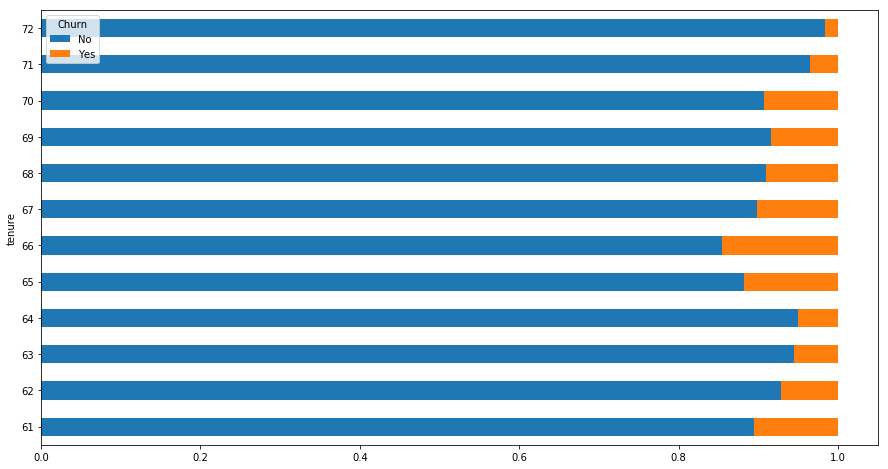

In [31]:
Telco_df.hist('tenure', bins = 72, figsize=(13,8))
Telco_df.groupby('tenure')['Churn'].value_counts(True).unstack(1).sort_values('tenure').iloc[1:12,].plot.barh(stacked= True, figsize=(15,8))
Telco_df.groupby('tenure')['Churn'].value_counts(True).unstack(1).sort_values('tenure').iloc[60:72,].plot.barh(stacked= True, figsize=(15,8))


Summary:
    - Early months are extremely prone to leaving. Why?
    - Later months show less time clients leaving. Why?

### a.) Simple bar graph of our variables:

Important:
- Churn ratio from Churn is ~1/3
- There are a large amount of people with month-to-month contract and a fair split in the 1 and 2 year contract


Characteristics of Telco customers from this data:
- Dependents ratio are roughly 2.5 difference
- PhoneService ratio is very different
- SeniorCitizen has 1/6 ratio to non-senior citizen
- Partner has 1/2 ratio
- PaperlessBilling seem roughly balance

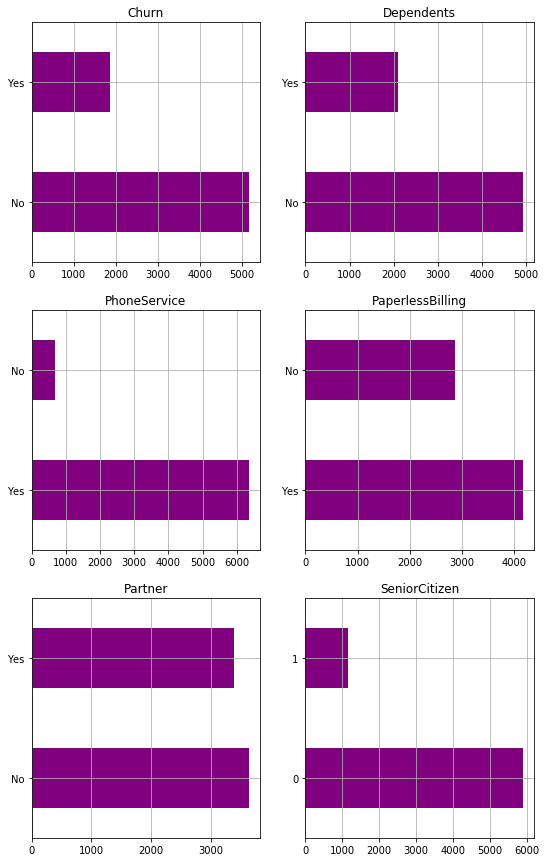

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9,15))

Telco_df['Churn'].value_counts().plot(kind = 'barh', grid = True, color= "purple", ax=axes[0,0])
Telco_df['Dependents'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[0,1])
Telco_df['PhoneService'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,0])
Telco_df['PaperlessBilling'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,1])
Telco_df['Partner'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[2,0])
Telco_df['SeniorCitizen'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[2,1])

axes[0,0].title.set_text('Churn')
axes[0,1].title.set_text('Dependents')
axes[1,0].title.set_text('PhoneService')
axes[1,1].title.set_text('PaperlessBilling')
axes[2,0].title.set_text('Partner')
axes[2,1].title.set_text('SeniorCitizen')

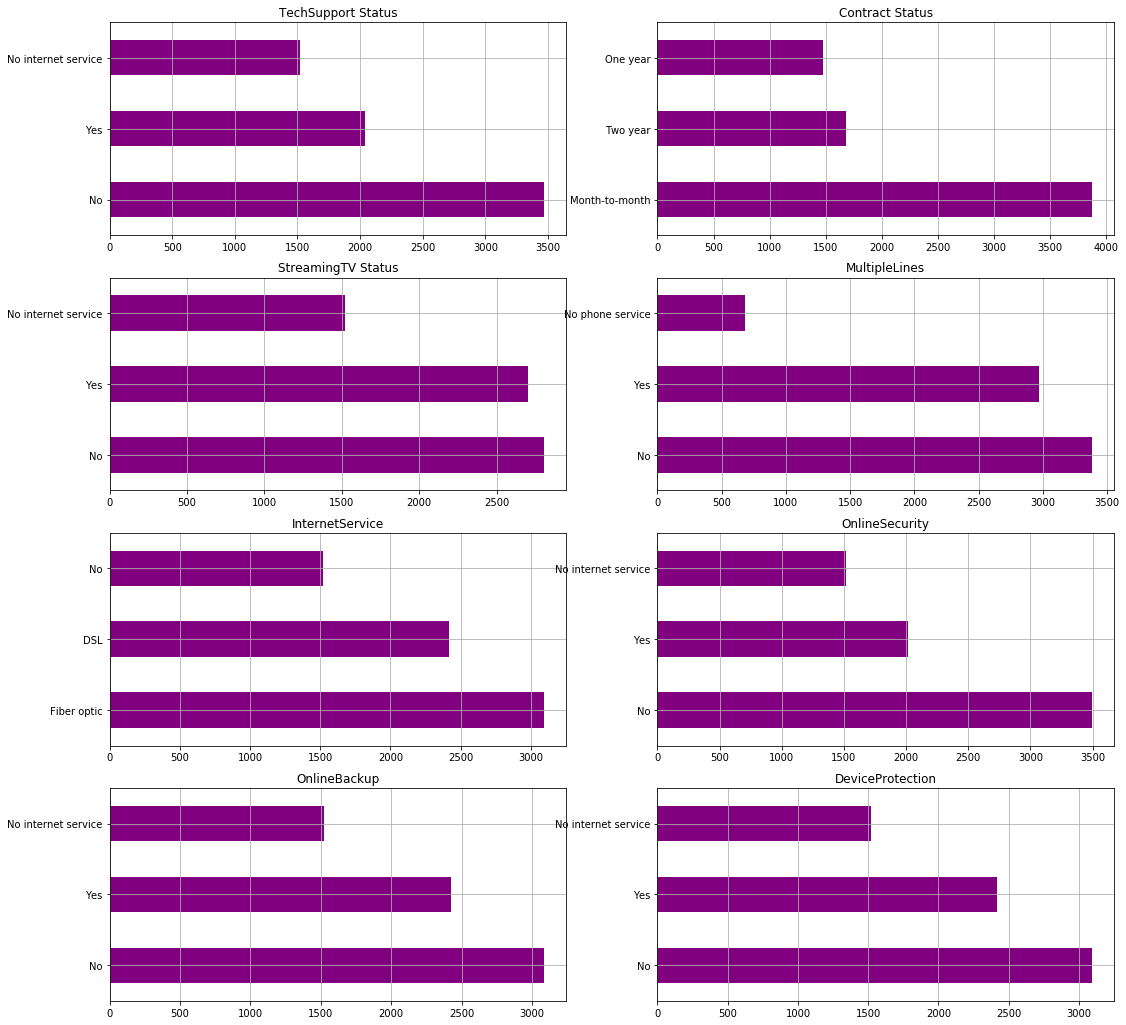

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,18))

Telco_df['TechSupport'].value_counts().plot(kind = 'barh', grid = True, color= "purple", ax=axes[0,0])
Telco_df['Contract'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[0,1])
Telco_df['StreamingTV'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,0])
Telco_df['MultipleLines'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,1])
Telco_df['InternetService'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[2,0])
Telco_df['OnlineSecurity'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[2,1])
Telco_df['OnlineBackup'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[3,0])
Telco_df['DeviceProtection'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[3,1])


axes[0,0].title.set_text('TechSupport Status')
axes[0,1].title.set_text('Contract Status')
axes[1,0].title.set_text('StreamingTV Status')
axes[1,1].title.set_text('MultipleLines')
axes[2,0].title.set_text('InternetService')
axes[2,1].title.set_text('OnlineSecurity')
axes[3,0].title.set_text('OnlineBackup')
axes[3,1].title.set_text('DeviceProtection')



## a.) Complex Data Analysis -
------------


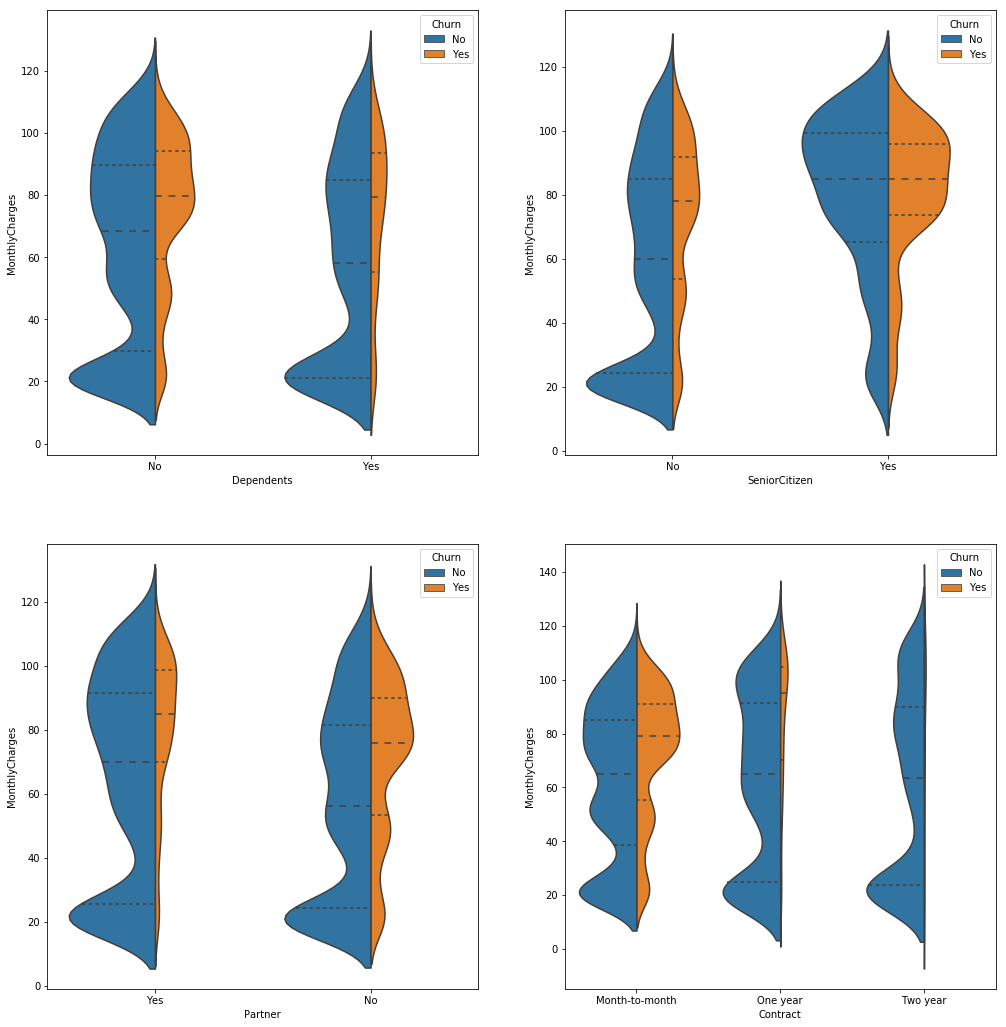

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,18))

sns.violinplot(x="Dependents", y="MonthlyCharges",hue="Churn", scale="count", inner="quartile", data=Telco_df, ax=axes[0,0], split=True)
sns.violinplot(x="SeniorCitizen", y="MonthlyCharges",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[0,1], split=True)
sns.violinplot(x="Partner", y="MonthlyCharges",hue="Churn", scale="count", inner="quartile", data=Telco_df, ax=axes[1,0], split=True)
sns.violinplot(x="Contract", y="MonthlyCharges",hue="Churn", scale="count", inner="quartile", data=Telco_df, ax=axes[1,1], split=True)

Notes: Really interesting to see:
    - non-partnered and month-to-month see the highest churn rate.
    - Two year contracts and one year contract see no churn rate.
    - Senior Citizens is interesting in that it looks like a 50-50 split

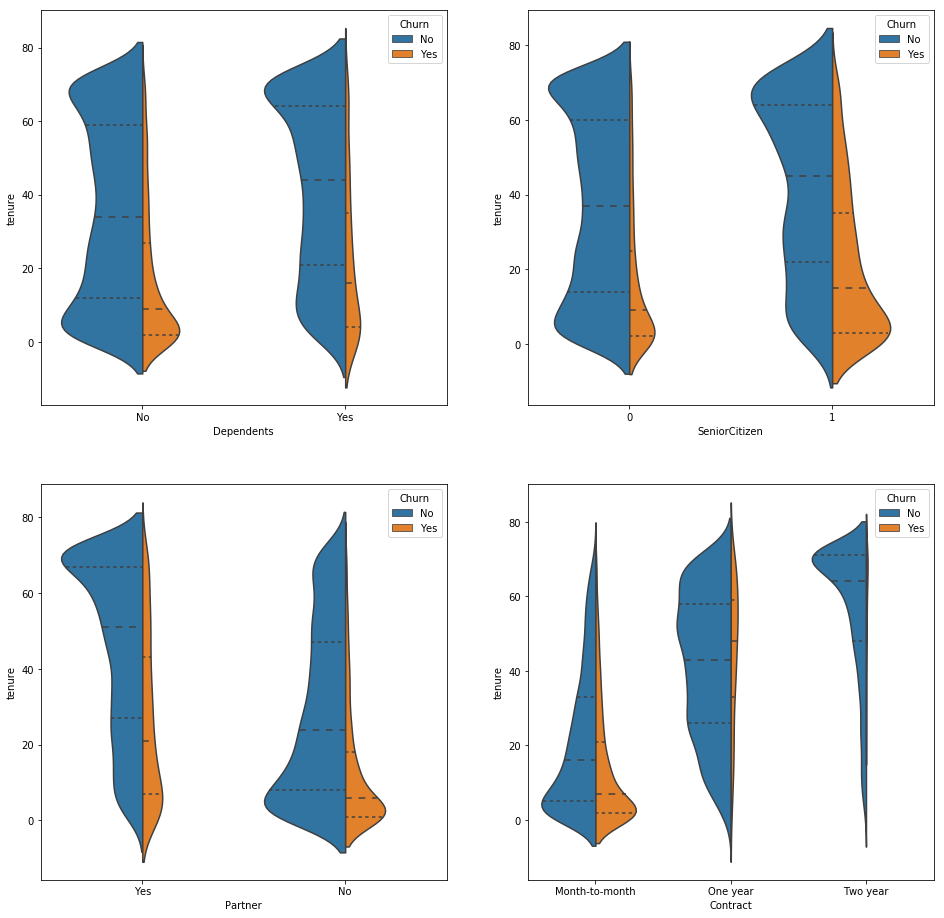

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

sns.violinplot(x="Dependents", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[0,0], split=True)
sns.violinplot(x="SeniorCitizen", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[0,1], split=True)
sns.violinplot(x="Partner", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[1,0], split=True)
sns.violinplot(x="Contract", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[1,1], split=True)

Notes: Really interesting to see:
    - Month-to-Month at early months have the highest churn concentrated 
    - Other contracts have many customers still retained
    - Not partnered have customers leaving in early months and the partnered are spread out
    for the entire timeline for months
    - Dependents and Senior citizens share the same story of heavier tail in the early months
    of leaving and thins out later. However, it is interesting to see Senior citizens have a
    stronger churn status fair well with staying 

### b.) Pairplot
------------
Pairplot 1: 
How does distribution play out when broken into Churn?

Highlights:
- Those that churn generally had the highest charges
- The Monthly charges vs Total charges however disagrees with the statement above. It tells the opposite.
------------

Pairplot 2:
How does distrbution play out when broken into Gender?

Highlights:
- Roughly all of the distribution seems to be the same

------------

Pairplot 3:
How does distribution play out when broken into SeniorCitizen?

Highlights:
- Senior Citizens seem to be charged more as the months go by while non-senior citizens seem to be paying a lot more in the early months, dip lower, then increase in monthly payments later on.
------------

Pairplot 3:
How does distribution play out when broken into contract?

Highlights:
- For tenure, Month-to-Month fall on the left in the distribution, one year seems to be distributed evenly with a right heavier side, and two year are strongly populated on the right.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


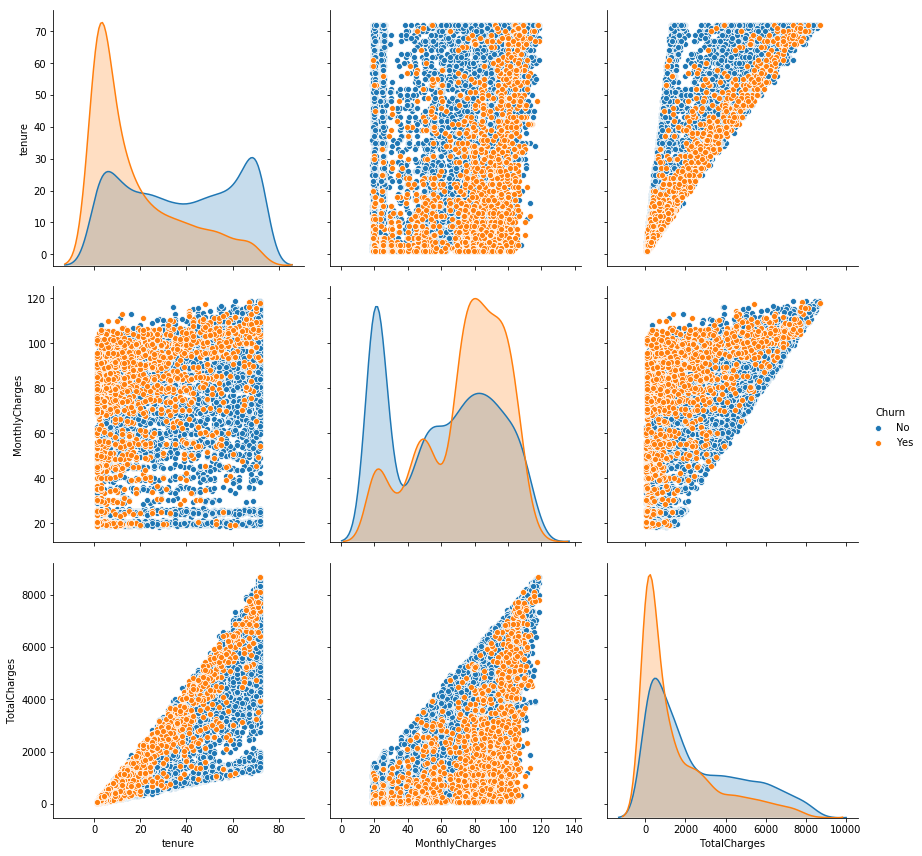

In [267]:
import seaborn as sns

sns.pairplot(Telco_df, hue="Churn", height= 4);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


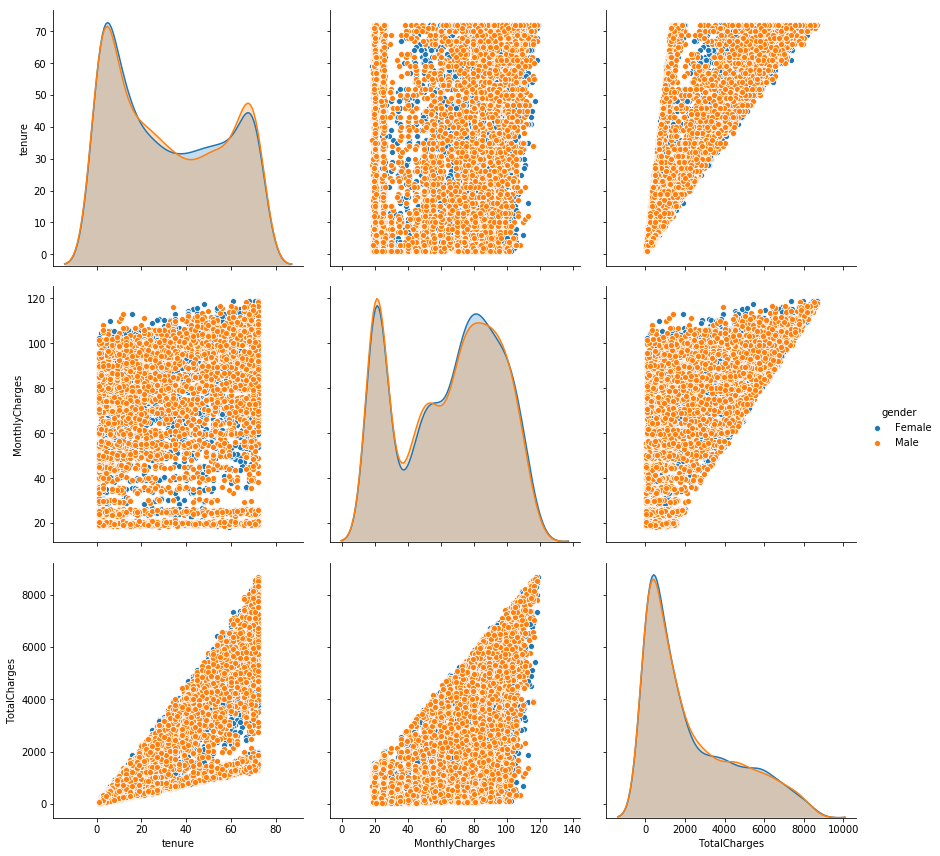

In [269]:
import seaborn as sns
sns.pairplot(Telco_df, hue="gender", height= 4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


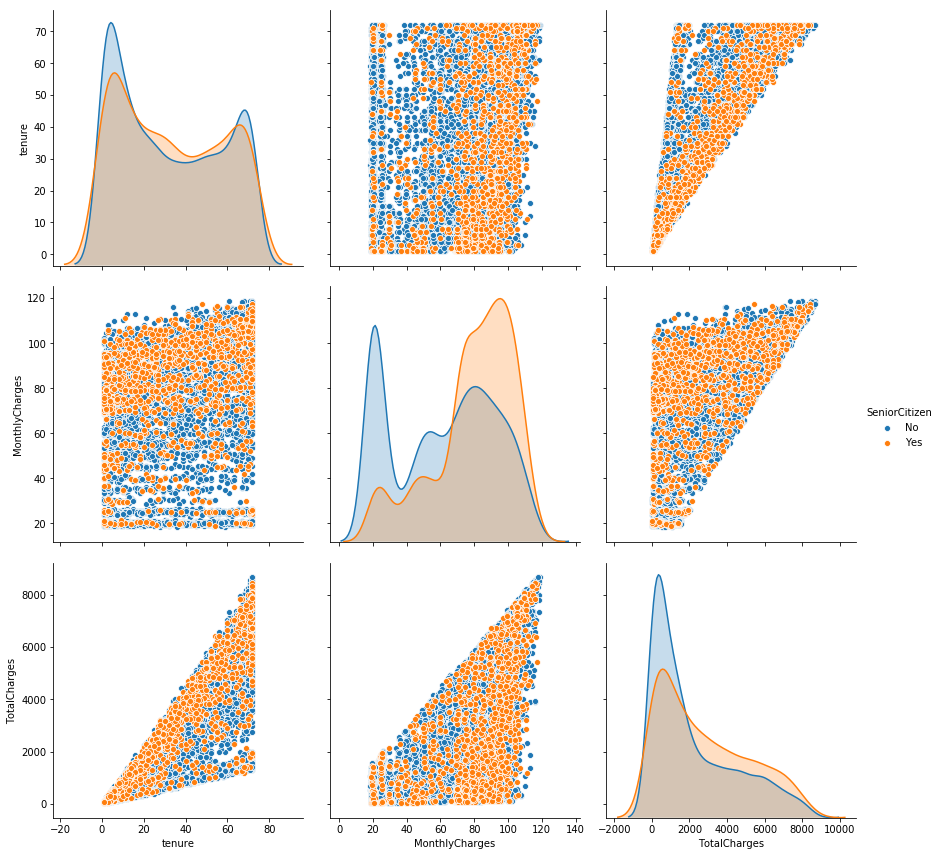

In [271]:
import seaborn as sns
sns.pairplot(Telco_df, hue="SeniorCitizen", height= 4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


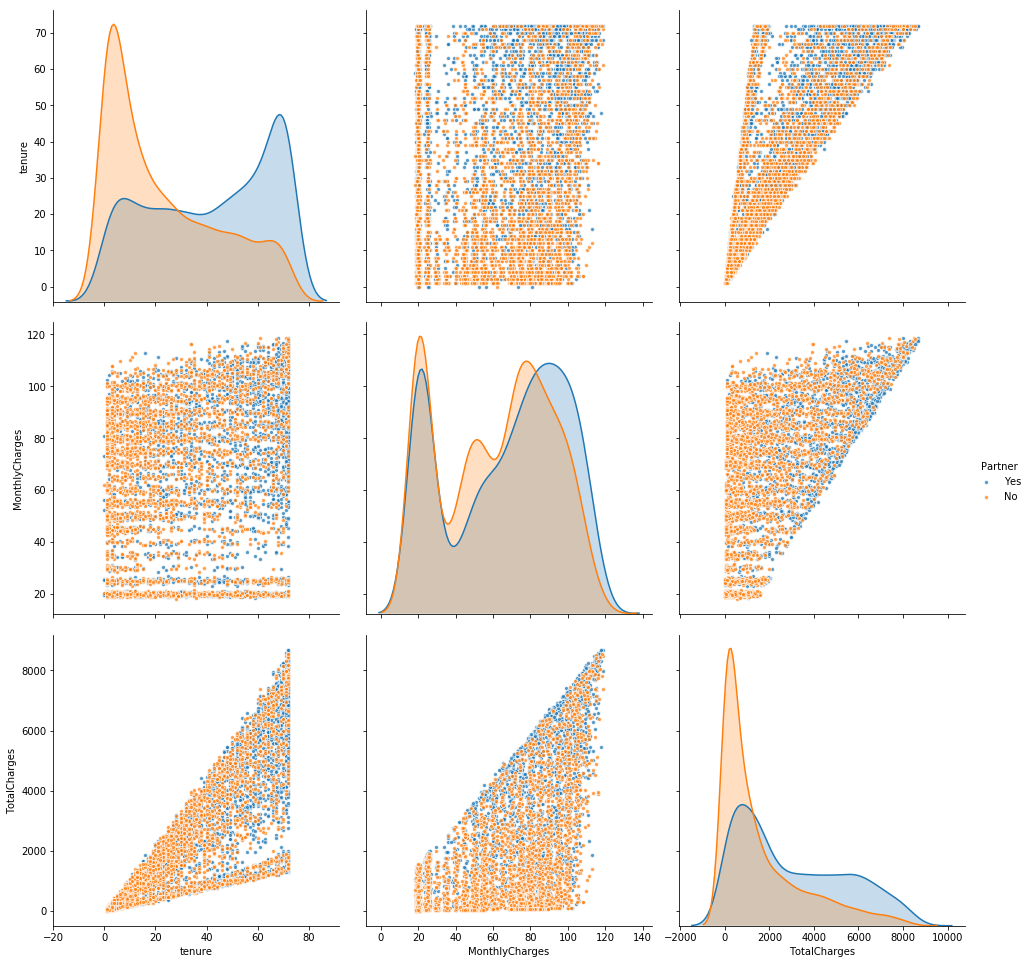

In [40]:
sns.pairplot(Telco_df, hue="Partner", height= 4.5, plot_kws = {'alpha': 0.75,'s': 15})

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for 

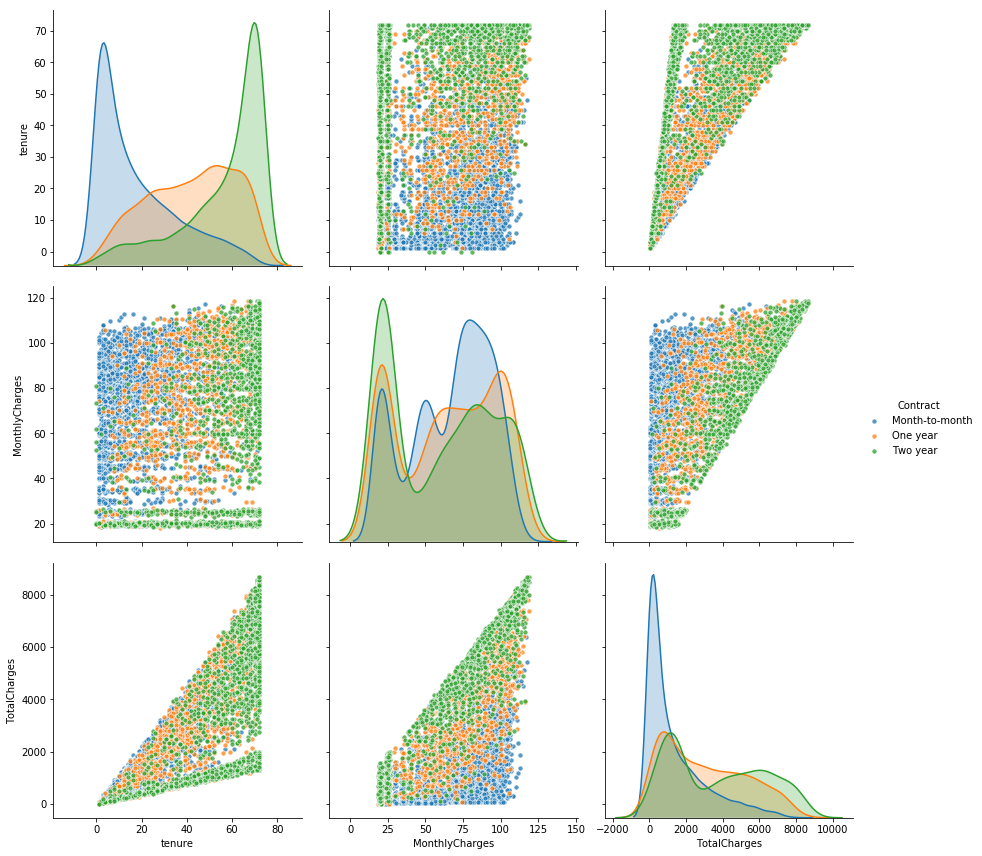

In [38]:
sns.pairplot(Telco_df, hue="Contract", height= 4.5, plot_kws = {'alpha': 0.75,'s': 25},
             size = 4)

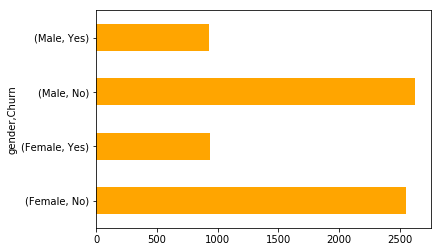

In [72]:
Telco_df.groupby('gender')['Churn'].value_counts().plot(kind = "barh", color = "orange")

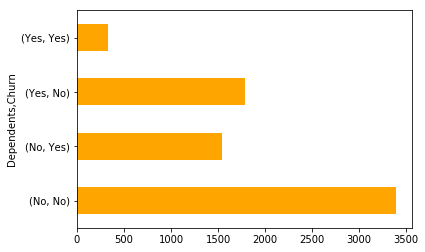

In [81]:
Telco_df.groupby('Dependents')['Churn'].value_counts().plot(kind = "barh", color = "orange")

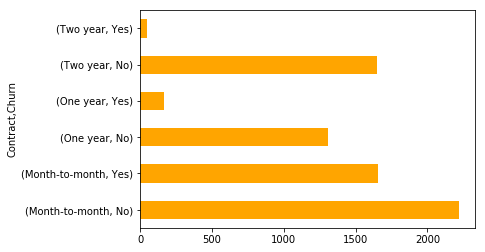

In [82]:
Telco_df.groupby('Contract')['Churn'].value_counts().plot(kind = "barh", color = "orange")

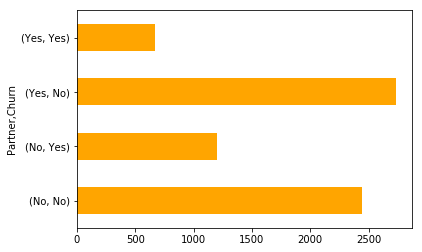

In [92]:
Telco_df.groupby('Partner')['Churn'].value_counts().plot(kind = "barh", color = "orange")


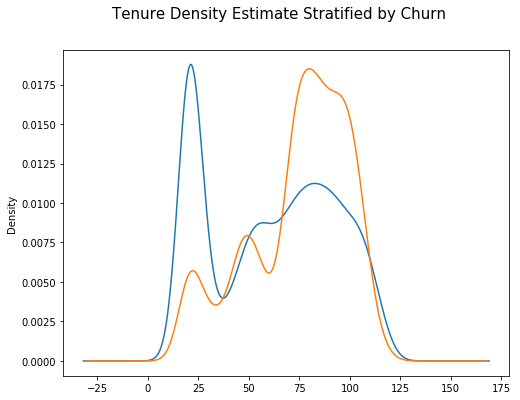

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
bp = Telco_df.groupby('Churn')['MonthlyCharges'].plot(kind='kde', ax=ax)
fig.suptitle('Tenure Density Estimate Stratified by Churn', fontsize=15)
fig.add_axes(x='Tenure', fontsize=18)

In [130]:
Telco_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# More Feature Engineering

In [103]:
columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

for col in columns:
    tmp_df = pd.get_dummies(Telco_df[col], prefix=col)
    Telco_df = pd.concat((Telco_df, tmp_df), axis=1)

In [104]:
Telco_df = Telco_df.drop(columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])


In [105]:
Telco_df['gender'] = np.where((Telco_df.gender == 'Male'), 1, 0)
Telco_df['Dependents'] = np.where((Telco_df.Dependents == 'Yes'), 1, 0)
Telco_df['Partner'] = np.where((Telco_df.Partner == 'Yes'), 1, 0)
Telco_df['PaperlessBilling'] = np.where((Telco_df.PaperlessBilling == 'Yes'), 1, 0)
Telco_df['PhoneService'] = np.where((Telco_df.PhoneService == 'Yes'), 1, 0)


In [81]:
list(Telco_df)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentM

In [86]:
Telco_df.to_csv("Telco-Customer-Churn.csv")